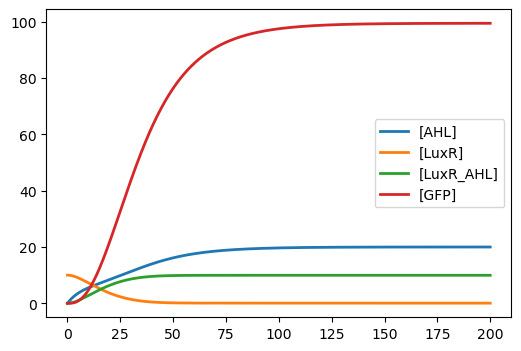

In [3]:
import tellurium as te
import matplotlib.pyplot as plt

model = te.loada("""
model time_delay_output
// Species
AHL = 0;  // Input signal molecule
LuxR = 10;  // Constitutive protein
LuxR_AHL = 0;  // Complex that activates GFP
GFP = 0;  // Output protein
                 
// Parameters
k_bind = 0.01; // AHL binds to LuxR
k_unbind = 0.001; // Complex falls apart
k_activate = 0.5; // LuxR_AHL makes GFP
k_deg_GFP = 0.05; // GFP degradation
k_syn_AHL = 1; // AHL is produced constantly
k_deg_AHL = 0.05; // AHL degradation
                 
// Reactions
J0: -> AHL; k_syn_AHL 
J1: AHL + LuxR -> LuxR_AHL; k_bind*AHL*LuxR
J1r: LuxR_AHL -> AHL + LuxR; k_unbind*LuxR_AHL
J2: -> GFP; k_activate*LuxR_AHL
J3: GFP -> ; k_deg_GFP*GFP
J4: AHL -> ; k_deg_AHL*AHL
end
""")

model.simulate(0, 200, 1000)
model.plot()
    